In [446]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [447]:
df = pd.read_csv("C:\\Users\\MSI\\Desktop\\big_mart\\big_mart_train.csv")

In [448]:
print(df.shape)
df.head()

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [450]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [451]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

[Text(0, 0.5, 'Sales_Count'), Text(0.5, 0, 'Sales')]

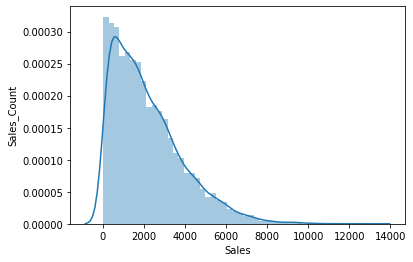

In [452]:
sns.distplot(df['Item_Outlet_Sales'], norm_hist=False, kde=True).set(xlabel='Sales', ylabel='Sales_Count')

In [453]:
df = df[df['Item_Outlet_Sales'] < 10000 ]
df.reset_index(drop=True).head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


[Text(0, 0.5, 'Sales_Count'), Text(0.5, 0, 'Sales')]

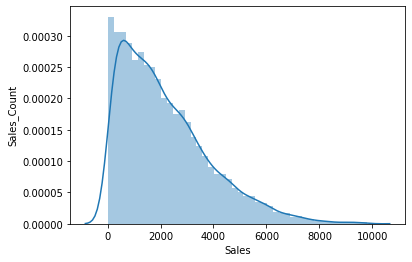

In [454]:
sns.distplot(df['Item_Outlet_Sales'], norm_hist=False, kde=True).set(xlabel='Sales', ylabel='Sales_Count')

In [455]:
df.shape

(8515, 12)

In [456]:
#Seperate categorical from numberical variables for analysis 
numerical_features = df.select_dtypes([np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude = [np.number,np.datetime64]).columns.tolist()

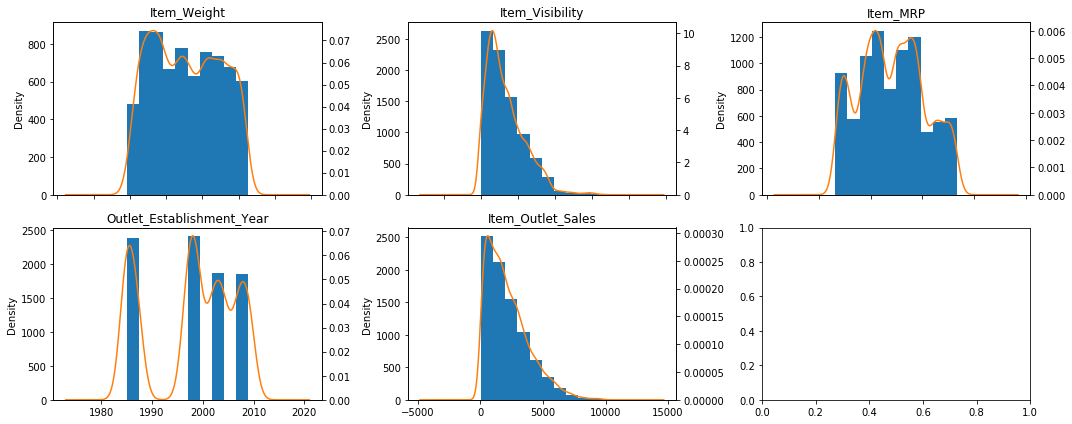

In [457]:
k = len(df[numerical_features].columns)
n = 3
m = (k - 1) // n + 1 ## Floor Division (also called Integer Division)
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(df[numerical_features].iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)

fig.tight_layout()

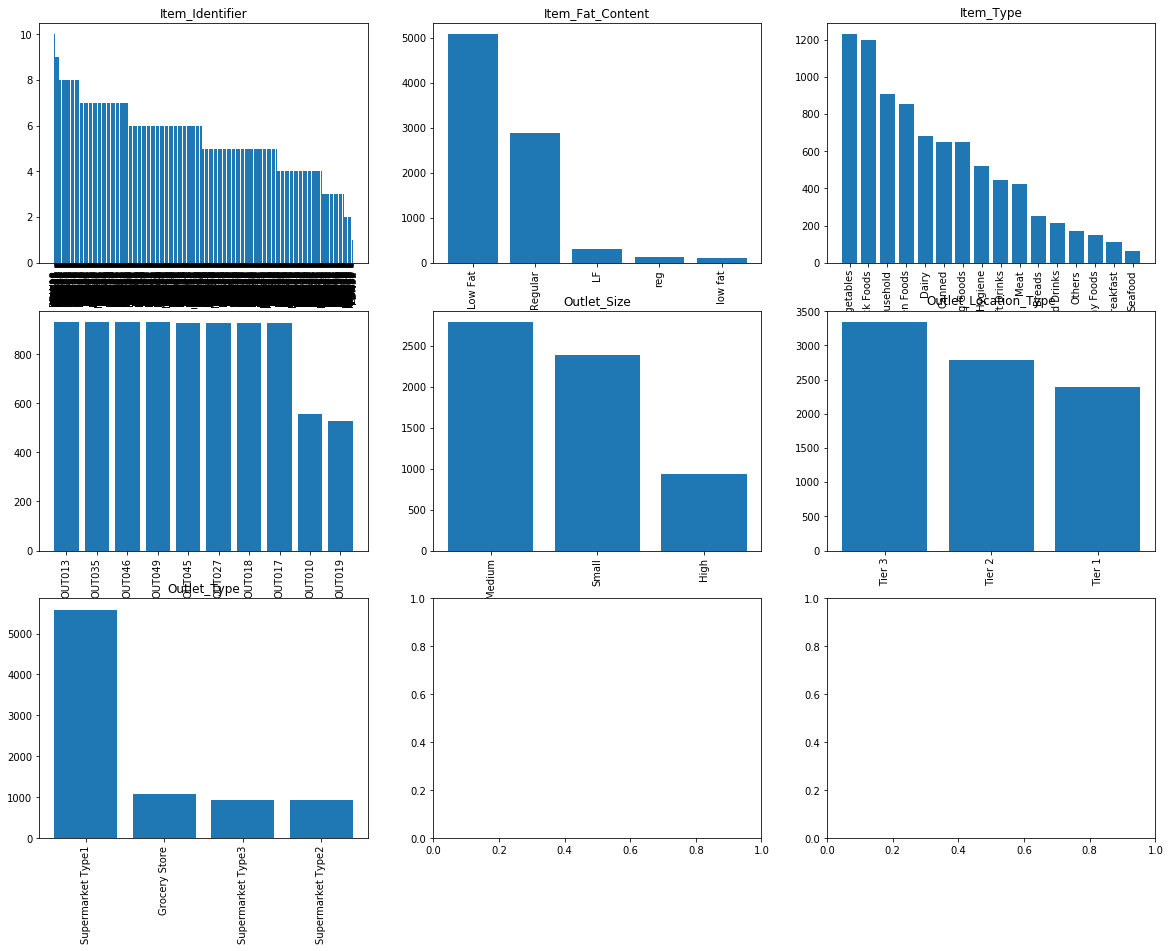

In [458]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in categorical_features:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

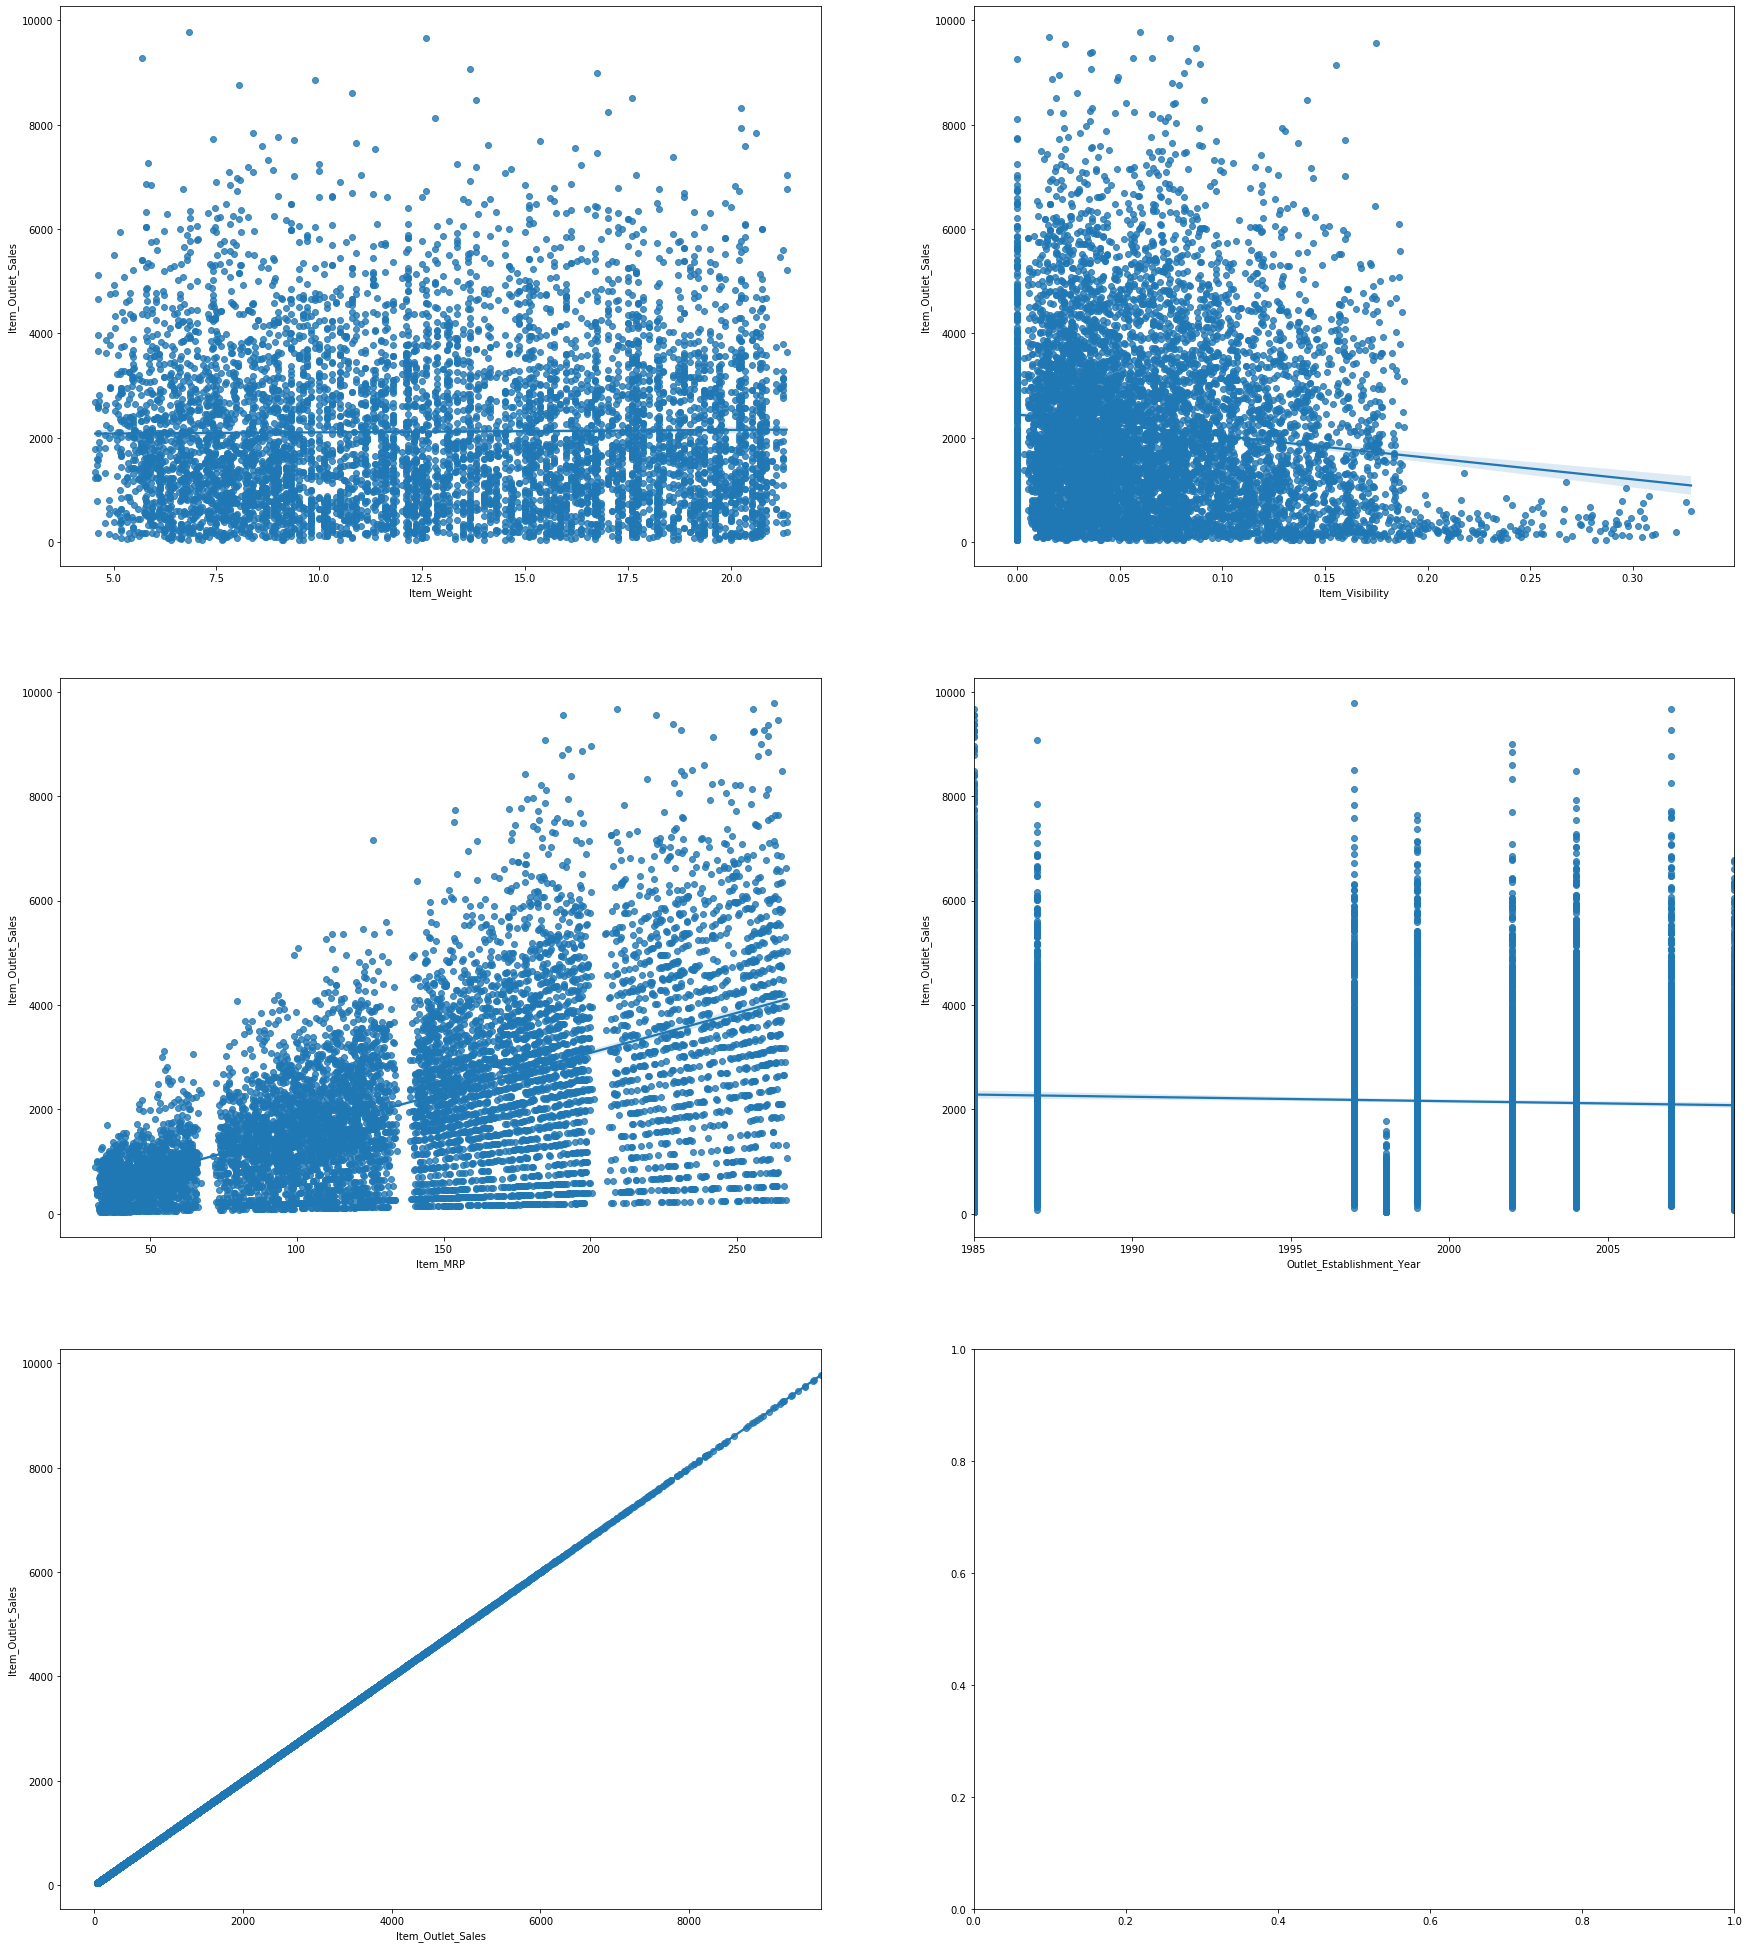

In [459]:
fig, ax = plt.subplots(3, 2, figsize=(30, 35))
for variable, subplot in zip(numerical_features, ax.flatten()):
    sns.regplot(x=df[variable], y=df['Item_Outlet_Sales'], ax=subplot)

In [460]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [461]:
df["Item_Fat_Content"].replace("LF", "Low Fat", inplace = True)
df["Item_Fat_Content"].replace("low fat", "Low Fat", inplace = True)
df["Item_Fat_Content"].replace("reg", "Regular", inplace = True)

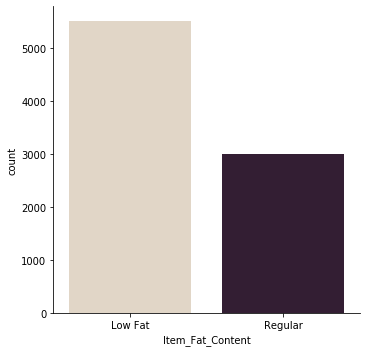

In [462]:
sns.catplot(x = "Item_Fat_Content", kind="count", palette="ch:.25", data=df)

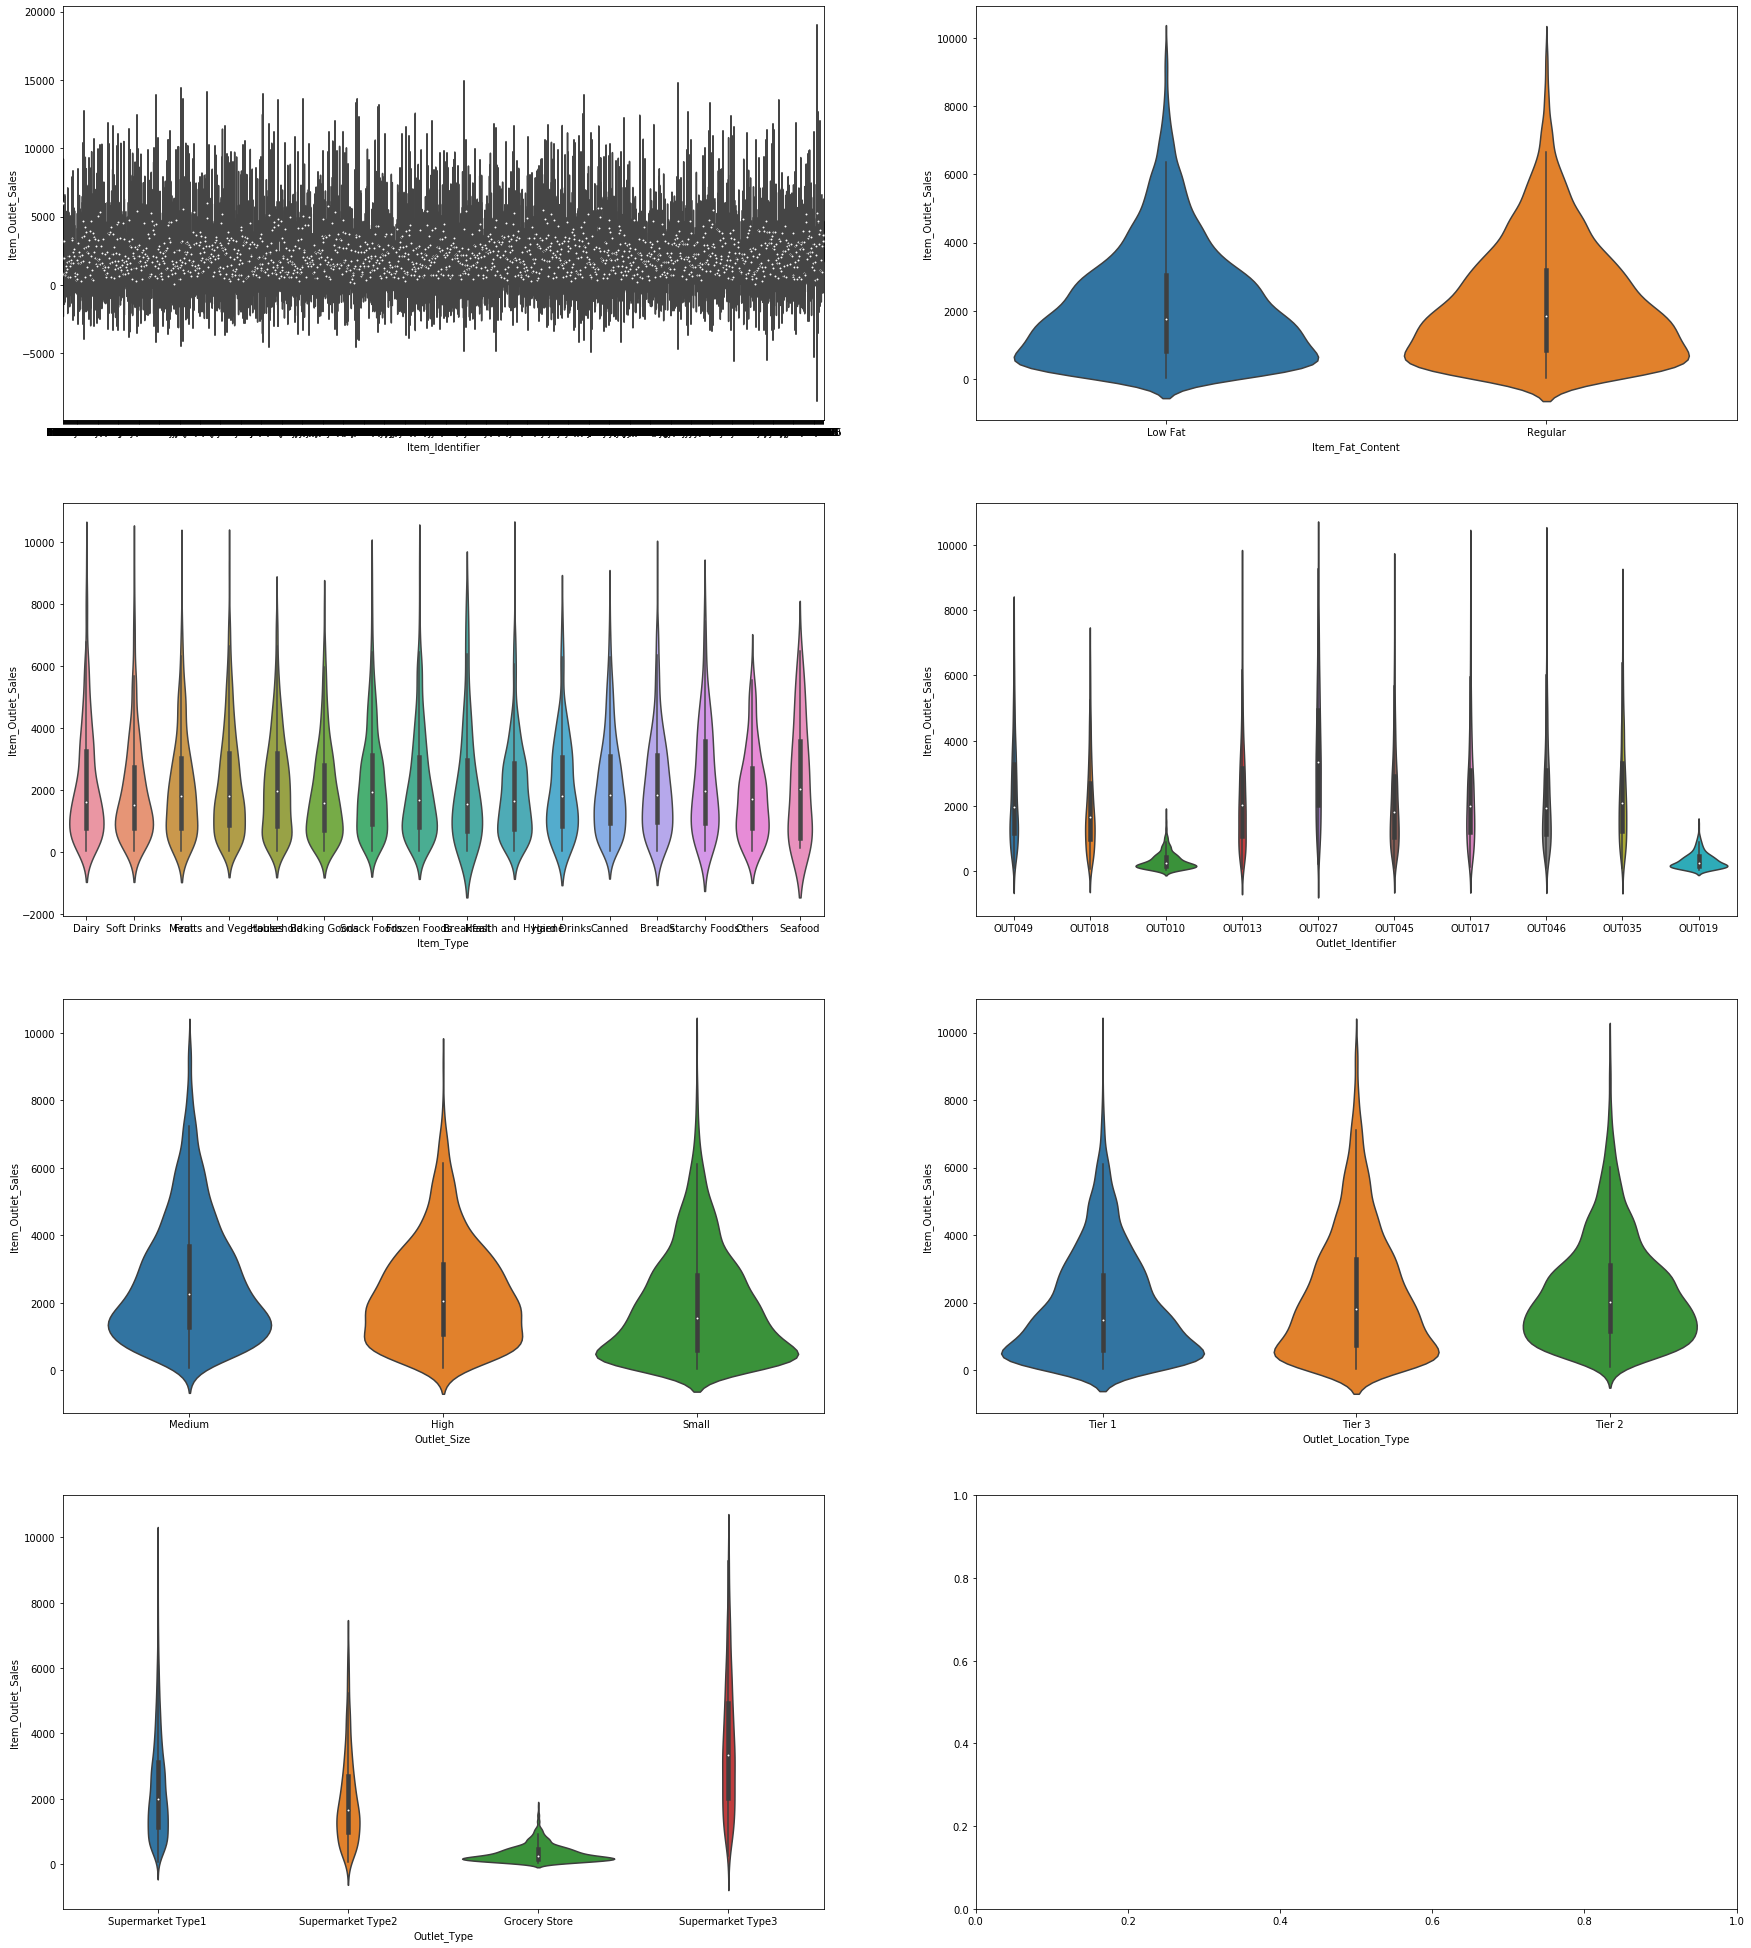

In [463]:
fig, ax = plt.subplots(4, 2, figsize=(30, 35))
for variable, subplot in zip(categorical_features, ax.flatten()):
    sns.violinplot(x=df[variable], y=df['Item_Outlet_Sales'], ax=subplot)

In [464]:
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0], inplace=True)
df["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace = True)

In [465]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [466]:
df["Item_Visibility"].replace(0, df["Item_Visibility"].mean(), inplace = True)

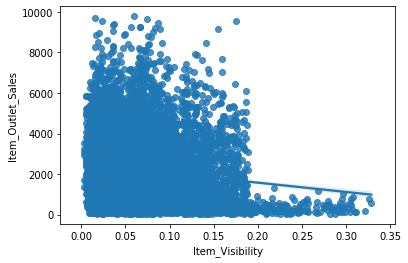

In [467]:
sns.regplot(x=df["Item_Visibility"], y=df['Item_Outlet_Sales'])

In [468]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [469]:
df["Outlet_Service_Years"] = 2013 - df["Outlet_Establishment_Year"]

In [470]:
df = df.drop(["Outlet_Establishment_Year"], axis = 1)

In [471]:
df["Item_Price_Unit_Weight"] = df["Item_MRP"]/df["Item_Weight"]

In [472]:
df["Item_MRP_Cluster"] = pd.cut(df["Item_MRP"], [0,70,140,200,np.inf], labels = [1,2,3,4])

In [473]:
df["Item_Category"] = df["Item_Identifier"].apply(lambda x:x[0:2])
df["Item_Category"] = df["Item_Category"].map({"FD" : "Food", "NC" : "Non-Consumable", "DR" : "Drinks"})

In [474]:
df['Item_Perishability'] = df.apply(lambda row: 'Perishable' if (row.Item_Type == "Breads" or row.Item_Type == "Breakfast" or
                                                                 row.Item_Type == "Dairy" or row.Item_Type == "Fruits and Vegetables" or
                                                                 row.Item_Type == "Meat" or row.Item_Type == "Seafood") else 'Non_Perishable' , axis = 1) 

In [475]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Service_Years,Item_Price_Unit_Weight,Item_MRP_Cluster,Item_Category,Item_Perishability
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14,26.861204,4,Food,Perishable
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4,8.153581,1,Drinks,Non_Perishable
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14,8.092457,3,Food,Perishable
3,FDX07,19.20,Regular,0.066166,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,15,9.484115,3,Food,Perishable
4,NCD19,8.93,Low Fat,0.066166,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26,6.031512,1,Non-Consumable,Non_Perishable


In [476]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [477]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Outlet_Service_Years', 'Item_Price_Unit_Weight', 'Item_MRP_Cluster',
       'Item_Category', 'Item_Perishability'],
      dtype='object')

In [478]:
print(df['Item_Identifier'].nunique())
print(df['Item_Fat_Content'].nunique())
print(df['Outlet_Identifier'].nunique())
print(df['Item_Type'].nunique())
print(df['Outlet_Size'].nunique())
print(df['Outlet_Location_Type'].nunique())
print(df['Outlet_Type'].nunique())
print(df['Item_Category'].nunique())
print(df['Item_Perishability'].nunique())

1559
2
10
16
3
3
4
3
2


In [479]:
df['Item_Identifier'] = le.fit_transform(df['Item_Identifier'])
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])

In [480]:
df = pd.get_dummies(df, columns = ['Item_Fat_Content', 'Outlet_Identifier', 'Item_Type', 'Item_Category', 'Item_Perishability'])

In [481]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Service_Years,Item_Price_Unit_Weight,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Category_Drinks,Item_Category_Food,Item_Category_Non-Consumable,Item_Perishability_Non_Perishable,Item_Perishability_Perishable
0,156,9.30,0.016047,249.8092,1,0,1,3735.1380,14,26.861204,...,0,0,0,0,0,0,1,0,0,1
1,8,5.92,0.019278,48.2692,1,2,2,443.4228,4,8.153581,...,0,0,0,1,0,1,0,0,1,0
2,662,17.50,0.016760,141.6180,1,0,1,2097.2700,14,8.092457,...,0,0,0,0,0,0,1,0,0,1
3,1121,19.20,0.066166,182.0950,1,2,0,732.3800,15,9.484115,...,0,0,0,0,0,0,1,0,0,1
4,1297,8.93,0.066166,53.8614,0,2,1,994.7052,26,6.031512,...,0,0,0,0,0,0,0,1,1,0


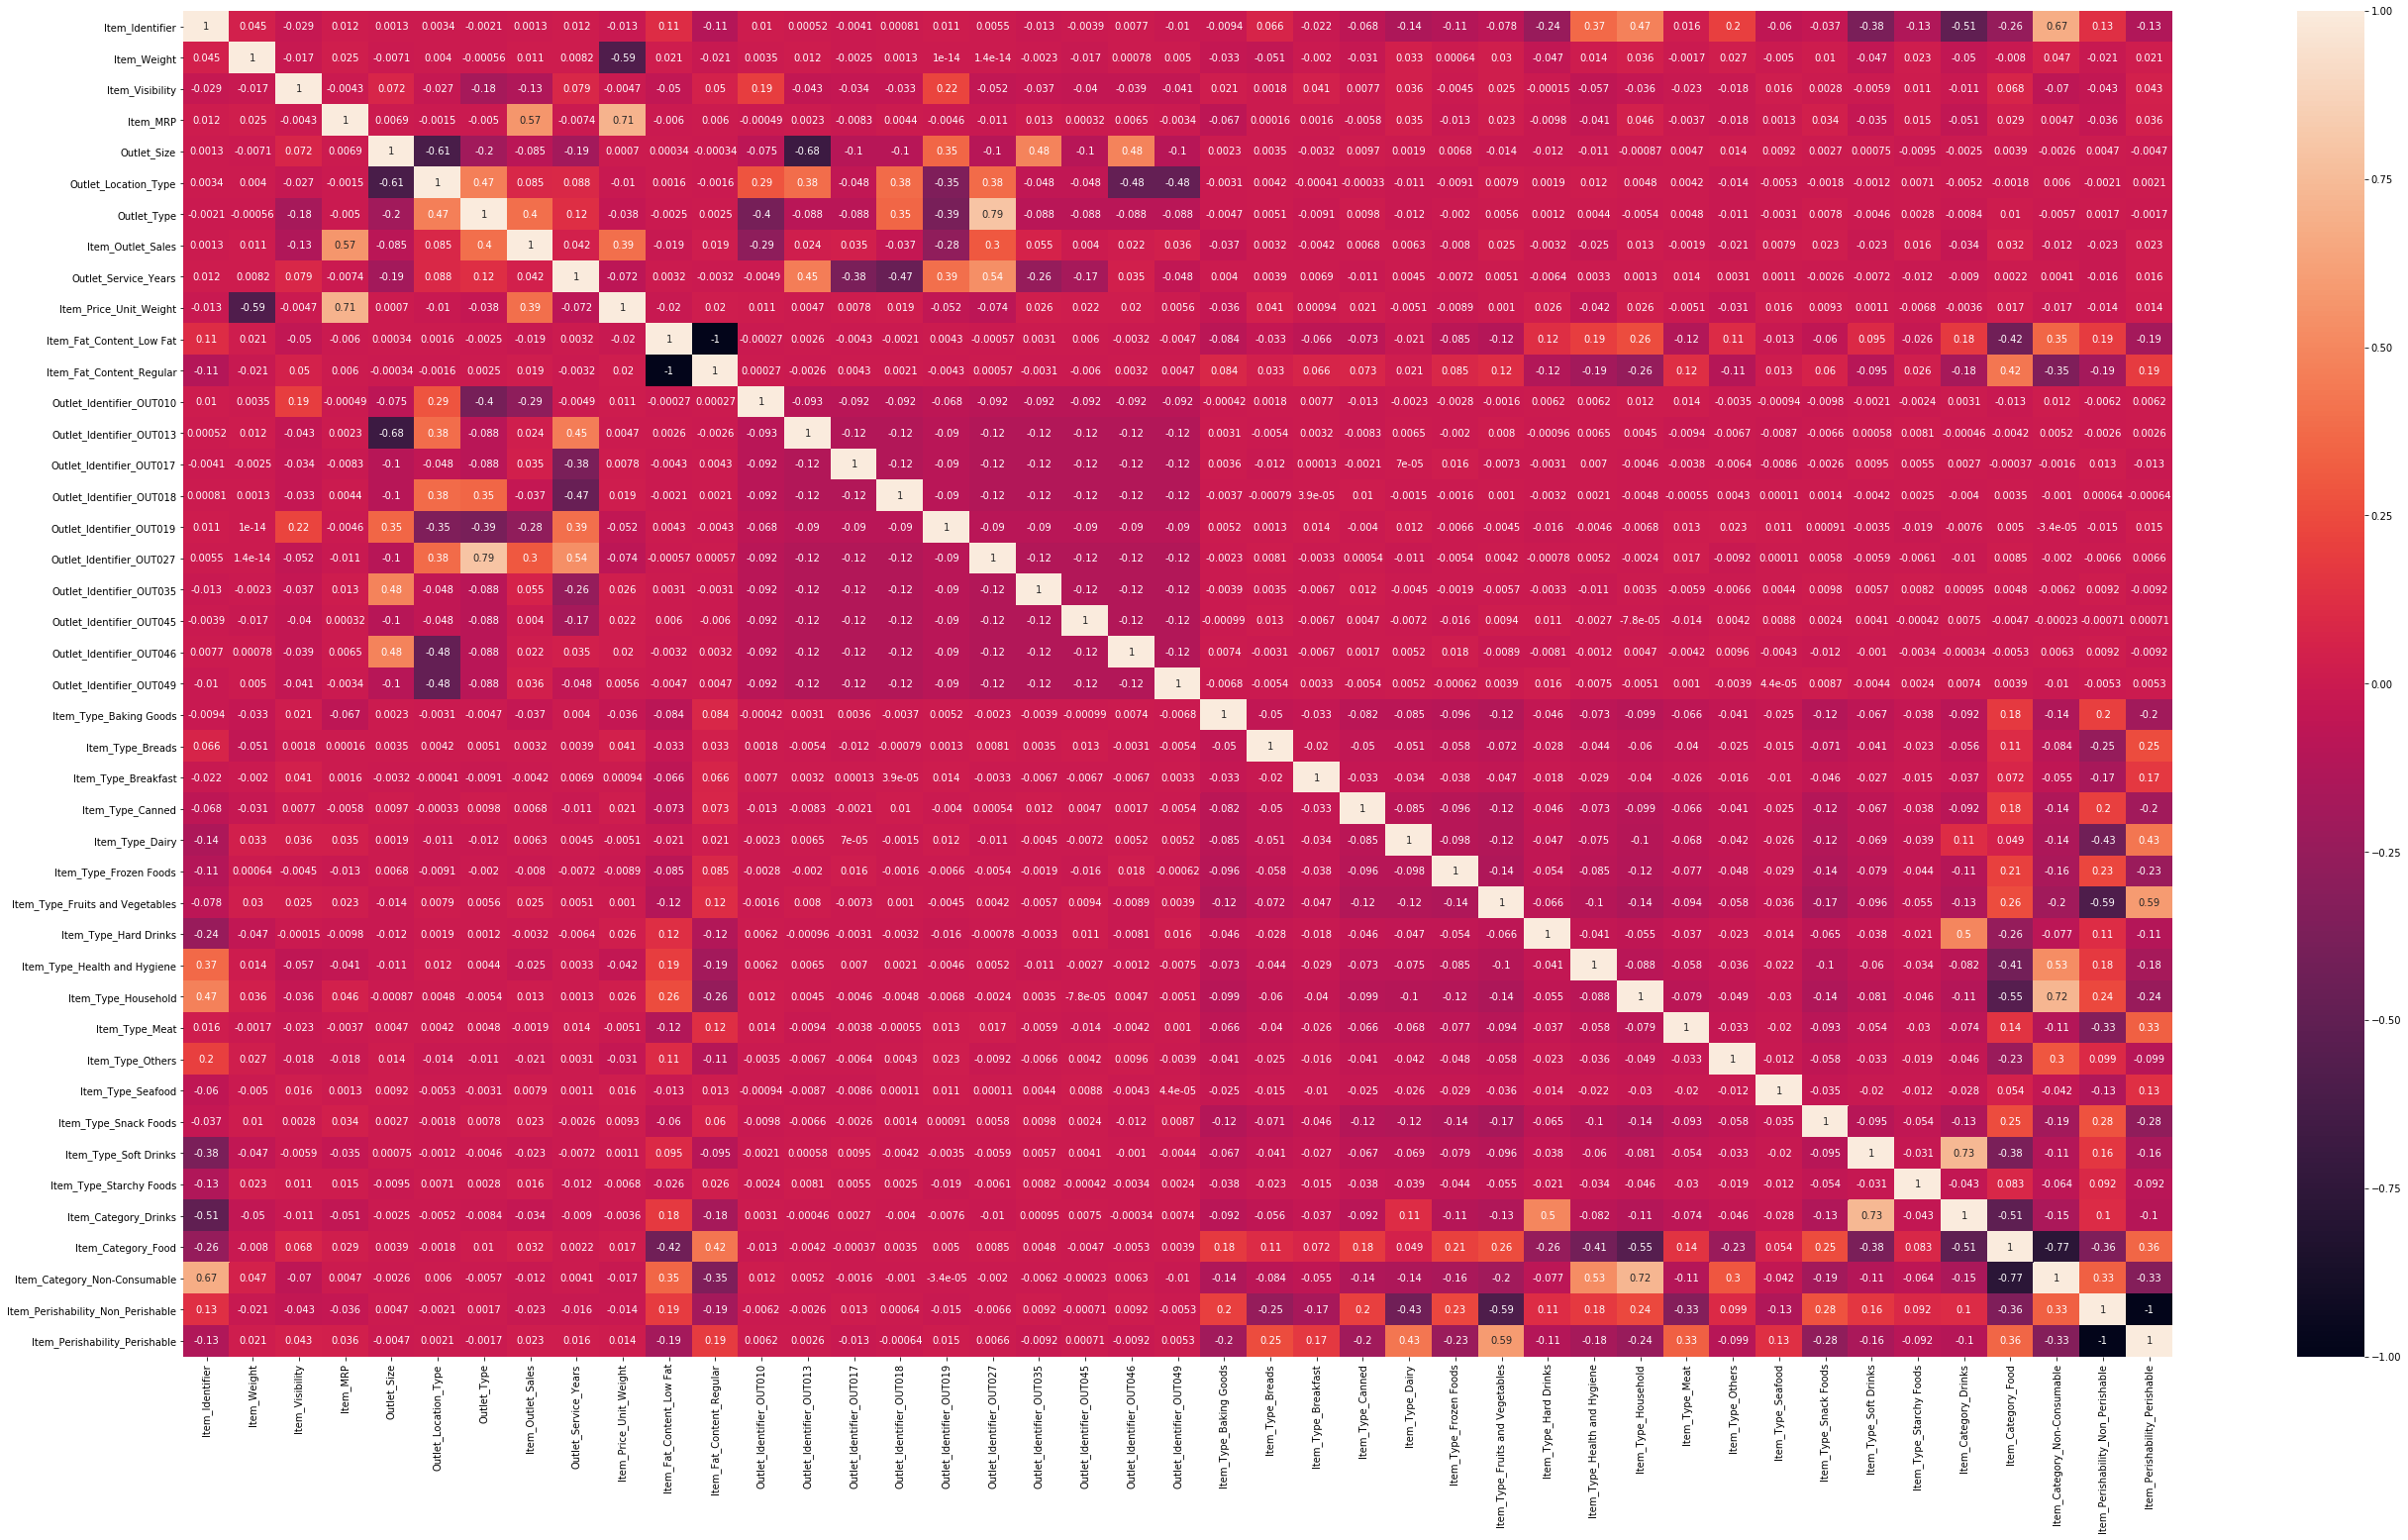

In [482]:
plt.figure(figsize=(45,25))
sns.heatmap(df.corr(),annot=True)

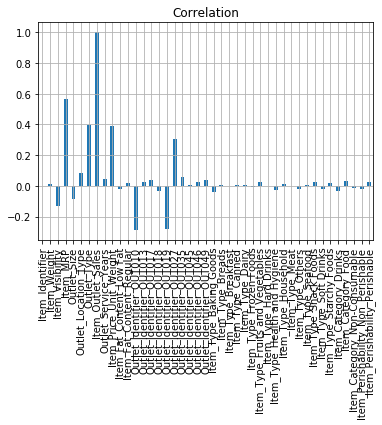

In [483]:
corr = df.corrwith(df.Item_Outlet_Sales).plot.bar(title = "Correlation", fontsize = 10, rot = 90, grid = True)
plt.show()

In [484]:
x = df.drop(["Item_Outlet_Sales"], axis = 1)
y = df["Item_Outlet_Sales"]

In [485]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x)

In [486]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)

In [487]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [489]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_val_pred = lr.predict(x_val)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
rmse = np.sqrt(mse)
print('For training data, root mean squared error: {:.4f}, R2: {:.4f}'.format(rmse, r2))
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
rmse = np.sqrt(mse)
print('For validation data, root mean squared error: {:.4f}, R2: {:.4f}'.format(rmse, r2))

For training data, root mean squared error: 1114.9721, R2: 0.5705
For validation data, root mean squared error: 1109.6179, R2: 0.5448


In [490]:
rr = Ridge(alpha=0.5)
rr.fit(x_train, y_train)
y_train_pred = rr.predict(x_train)
y_val_pred = rr.predict(x_val)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
rmse = np.sqrt(mse)
print('For training data, root mean squared error: {:.4f}, R2: {:.4f}'.format(rmse, r2))
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
rmse = np.sqrt(mse)
print('For validation data, root mean squared error: {:.4f}, R2: {:.4f}'.format(rmse, r2))

For training data, root mean squared error: 1114.9901, R2: 0.5704
For validation data, root mean squared error: 1109.4873, R2: 0.5449


In [491]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_train_pred = lasso.predict(x_train)
y_val_pred = lasso.predict(x_val)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
rmse = np.sqrt(mse)
print('For training data, root mean squared error: {:.4f}, R2: {:.4f}'.format(rmse, r2))
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
rmse = np.sqrt(mse)
print('For validation data, root mean squared error: {:.4f}, R2: {:.4f}'.format(rmse, r2))

For training data, root mean squared error: 1114.9882, R2: 0.5704
For validation data, root mean squared error: 1109.3461, R2: 0.5450


In [492]:
from sklearn.ensemble import RandomForestRegressor
cls = RandomForestRegressor(n_estimators=150)
cls.fit(x_train, y_train)
y_train_pred = cls.predict(x_train)
y_val_pred = cls.predict(x_val)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
rmse = np.sqrt(mse)
print('For training data, root mean squared error: {:.4f}, R2: {:.4f}'.format(rmse, r2))
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
rmse = np.sqrt(mse)
print('For validation data, root mean squared error: {:.4f}, R2: {:.4f}'.format(rmse, r2))

For training data, root mean squared error: 415.5956, R2: 0.9403
For validation data, root mean squared error: 1127.2510, R2: 0.5302
